In [3]:
!pip install --user datascience

In [4]:
from datascience import *
import numpy as np
path_data = '../../../assets/data/'

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

In [5]:
Table()

In [9]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [10]:
united.where('Destination','JKF')

Date,Flight Number,Destination,Delay


In [11]:
united.take(make_array(34,65,788))

Date,Flight Number,Destination,Delay
6/1/15,650,AUS,44
6/1/15,1076,IAD,3
6/6/15,525,IAD,-16


In [12]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows,1000))
systematic_sample.show()

Date,Flight Number,Destination,Delay
6/7/15,824,JFK,-2
6/14/15,3,SAN,-4
6/20/15,1250,IAH,12
6/27/15,351,SEA,25
7/4/15,361,LIH,-3
7/10/15,1710,LAX,42
7/17/15,864,RNO,-8
7/23/15,1937,IAH,7
7/30/15,1124,SEA,-10
8/5/15,1927,IAH,16


In [13]:
die = Table().with_column('Face',np.arange(1,7))
die

Face
1
2
3
4
5
6


In [14]:
die.sample(10)

Face
2
2
1
5
3
6
5
2
4
2


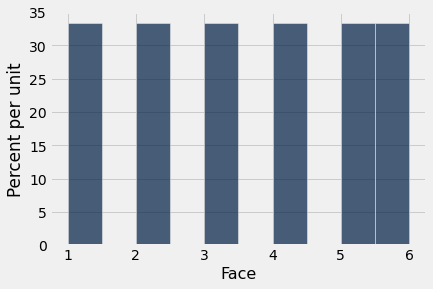

In [15]:
die.hist()

In [17]:
roll_bins = np.arange(0.5,6.6,1)

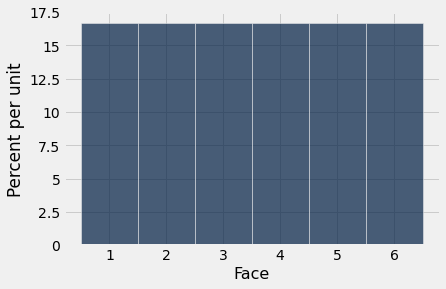

In [18]:
die.hist(bins=roll_bins)

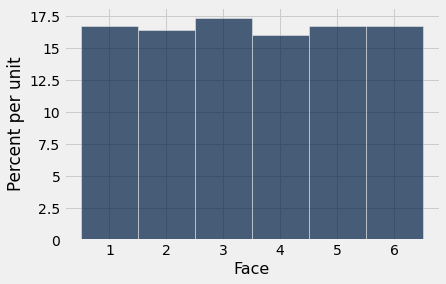

In [22]:
die.sample(10000).hist(bins=roll_bins)

In [23]:
distribution_in_pop = make_array(0.9,0.1)

In [24]:
distribution_in_pop

array([ 0.9,  0.1])

In [30]:
distribution_in_sample = sample_proportions(100,distribution_in_pop)

In [31]:
distribution_in_sample

array([ 0.88,  0.12])

In [34]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 201 , 5)

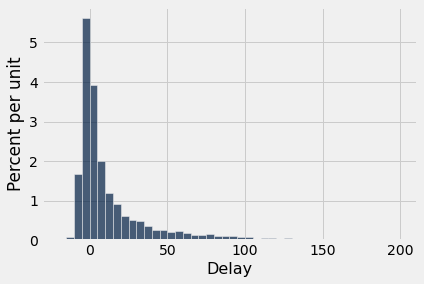

In [35]:
united.hist('Delay',bins = united_bins)

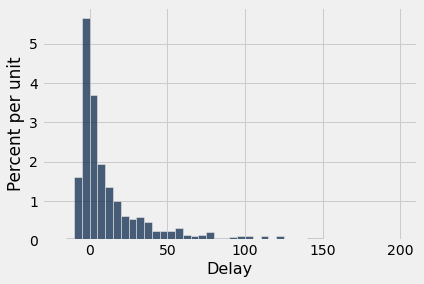

In [38]:
united.sample(1000).hist('Delay',bins = united_bins)

In [39]:
np.median(united.column('Delay'))

2.0

In [40]:
np.median(united.sample(10).column('Delay'))

11.5

In [41]:
np.median(united.sample(100).column("Delay"))

2.0

In [42]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [43]:
sample_median(10)

-1.5

In [45]:
num_simulations = 2000

In [6]:
sample_size = 100
eligible = [0.26, 0.74]

In [6]:
sample_proportions(sample_size, eligible).item(0)

NameError: name 'sample_proportions' is not defined

In [7]:
def simulate_one_count():
    return sample_size * sample_proportions(sample_size, eligible).item(0)

In [10]:
counts = make_array()
for i in np.arange(10000):
    counts = np.append(counts, simulate_one_count())

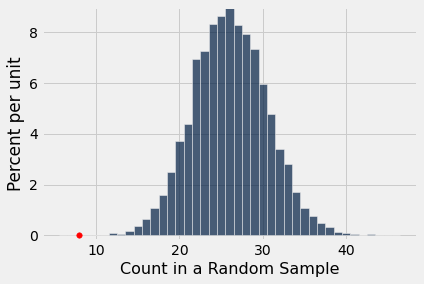

In [12]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

In [13]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


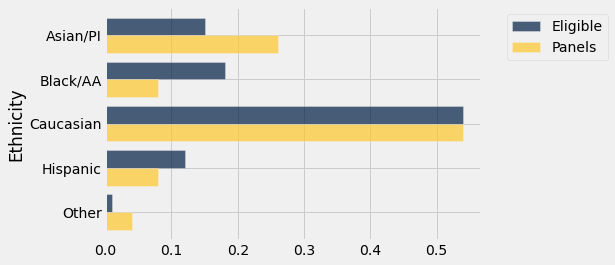

In [14]:
jury.barh('Ethnicity')

In [21]:
jury_with_diffs = jury.with_column(
   'Difference',jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [15]:
eligible_population = jury.column('Eligible')

In [16]:
sample_proportions(1453, eligible_population)

array([ 0.17343427,  0.16173434,  0.53337922,  0.12250516,  0.00894701])

In [18]:
sample_distribution = sample_proportions(1453 ,eligible_population)
panel_and_sample = jury.with_column('Random Sample', sample_distribution)
panel_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.14797
Black/AA,0.18,0.08,0.179628
Caucasian,0.54,0.54,0.551273
Hispanic,0.12,0.08,0.112182
Other,0.01,0.04,0.00894701


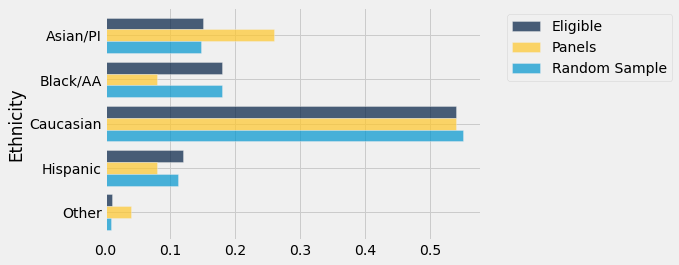

In [19]:
panel_and_sample.barh('Ethnicity')

In [1]:
mendel_pro = [0.75, 0.25]

In [2]:
sample_size = 929
observed_count = 705
observed_percent = 100 *observed_count/sample_size


In [3]:
observed_percent












75.8880516684607

In [4]:
observed_distance = abs(observed_percent - 75)
observed_distance

0.8880516684607045

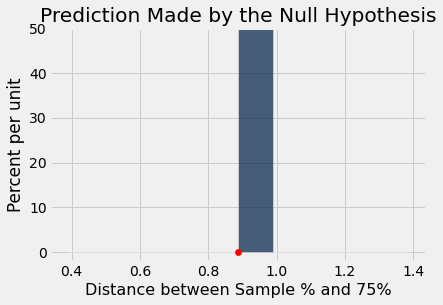

In [13]:
Table().with_column(
    'Distance between Sample % and 75%', observed_distance
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_distance, 0, color='red', s=40);

In [6]:
births = Table().read_table('baby.csv')

In [8]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [4]:
smoking_and_birthweight =births.select('Maternal Smoker','Birth Weight')

In [5]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


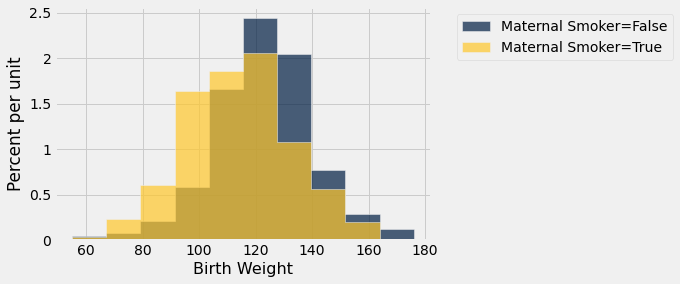

In [6]:
smoking_and_birthweight.hist('Birth Weight',group='Maternal Smoker')

In [7]:
means_table = smoking_and_birthweight.group('Maternal Smoker',np.average)

In [8]:
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [10]:
means = means_table.column(1)
observed_difference = means.item(1)-means.item(0)
observed_difference

-9.266142572024918

In [11]:
def difference_of_means(table,group_label):
    """Takes : name of table,
    column label thet indicate which group,
    two groups"""
    reduced = table.select('Birth Weight', group_label)
    
    means_table = reduced.group(group_label,np.average)
    
    means = means_table.column('Birth Weight average')
    
    return means.item(1)-means.item(0)

In [12]:
difference_of_means(births,'Maternal Smoker')

-9.266142572024918

In [30]:
staff = Table().with_columns(
     'Names',make_array('Jim','Pam','Dwight','Michel'),
     'Ages', make_array(29,28,34,41)
)

In [16]:
staff

Names,Ages
Jim,29
Pam,28
Dwight,34
Michel,41


In [17]:
staff.sample()

Names,Ages
Michel,41
Jim,29
Michel,41
Jim,29


In [18]:
staff.sample(with_replacement = False)

Names,Ages
Michel,41
Pam,28
Dwight,34
Jim,29


In [27]:
shuffled_names = staff.sample(with_replacement = False).column('Names')
staff.with_column('Shuffled',shuffled_names)

Names,Ages,Shuffled
Jim,29,Pam
Pam,28,Dwight
Dwight,34,Jim
Michel,41,Michel


In [20]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140
